Fetching stock data...
Data fetched successfully!
Total Rows: 21
Training Samples: 14
Testing Samples: 7
Price        Date       Close        High         Low        Open     Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL   
0      2024-12-03  242.649994  242.759995  238.899994  239.809998   38861000   
1      2024-12-04  243.009995  244.110001  241.250000  242.869995   44383900   
2      2024-12-05  243.039993  244.539993  242.130005  243.990005   40033900   
3      2024-12-06  242.839996  244.630005  242.080002  242.910004   36870600   
4      2024-12-09  246.750000  247.240005  241.750000  241.830002   44649200   
5      2024-12-10  247.770004  248.210007  245.339996  246.889999   36914800   
6      2024-12-11  246.490005  250.800003  246.259995  247.960007   45205800   
7      2024-12-12  247.960007  248.740005  245.679993  246.889999   32777500   
8      2024-12-13  248.130005  249.289993  246.240005  247.820007   33155300   
9      2024-12-

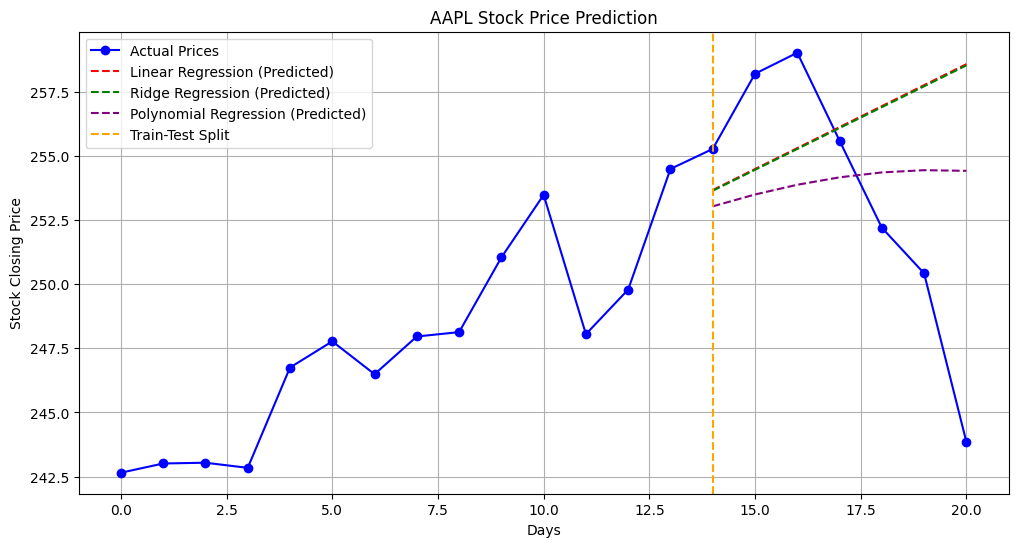

In [24]:
# Importing required libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Input: Stock Symbol and Period
stock_symbol = "AAPL"  # You can change this to any stock symbol you want
period = "1mo"  # You can change the period to "3mo", "6mo", "1y", "2y", "5y"
train_ratio = 0.7  # Train on approximately 70% of the data

# Fetch stock data
print("Fetching stock data...")
try:
    data = yf.download(stock_symbol, period=period, progress=False)
    if data.empty:
        print("No data found. Please try another stock symbol or period.")
    else:
        print("Data fetched successfully!")
        
        # Prepare data
        data.reset_index(inplace=True)
        data['Days'] = np.arange(len(data))
        X = data[['Days']]
        y = data['Close']
        
        # Train-test split
        train_days = int(len(data) * train_ratio)
        X_train = X[:train_days]
        y_train = y[:train_days]
        X_test = X[train_days:]
        y_test = y[train_days:]
        
        # Check dataset splits
        print(f"Total Rows: {len(data)}")
        print(f"Training Samples: {len(X_train)}")
        print(f"Testing Samples: {len(X_test)}")
        
        if len(X_test) == 0:
            print("Insufficient data for testing. Try selecting a longer period.")
        else:
            print(data);
            # Train Linear Regression Model
            model_lr = LinearRegression()
            model_lr.fit(X_train, y_train)
            y_pred_lr = model_lr.predict(X_test)
            
            # Train Ridge Regression Model
            model_ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
            model_ridge.fit(X_train, y_train)
            y_pred_ridge = model_ridge.predict(X_test)
            
            # Train Polynomial Regression Model
            poly = PolynomialFeatures(degree=3)  # You can experiment with degree=2, 3, 4
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            model_poly = LinearRegression()
            model_poly.fit(X_train_poly, y_train)
            y_pred_poly = model_poly.predict(X_test_poly)
            
            # Evaluate the models
            mse_lr = mean_squared_error(y_test, y_pred_lr)
            mse_ridge = mean_squared_error(y_test, y_pred_ridge)
            mse_poly = mean_squared_error(y_test, y_pred_poly)
            
            print(f"Linear Regression - Mean Squared Error (MSE): {mse_lr:.2f}")
            print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.2f}")
            print(f"Polynomial Regression - Mean Squared Error (MSE): {mse_poly:.2f}")
            
            # Visualize Results
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(data['Days'], y, label="Actual Prices", color="blue", marker="o")
            ax.plot(X_test['Days'], y_pred_lr, label="Linear Regression (Predicted)", color="red", linestyle="--")
            ax.plot(X_test['Days'], y_pred_ridge, label="Ridge Regression (Predicted)", color="green", linestyle="--")
            ax.plot(X_test['Days'], y_pred_poly, label="Polynomial Regression (Predicted)", color="purple", linestyle="--")
            ax.axvline(x=train_days, color="orange", linestyle="--", label="Train-Test Split")
            ax.set_xlabel("Days")
            ax.set_ylabel("Stock Closing Price")
            ax.set_title(f"{stock_symbol} Stock Price Prediction")
            ax.legend()
            ax.grid()
            plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


Fetching stock data...


[*********************100%***********************]  1 of 1 completed

Data fetched successfully!
Basic Linear Regression - Mean Squared Error (MSE): 59.03
Improved Linear Regression - Mean Squared Error (MSE): 25.75
Basic Linear Regression - Mean Absolute Error (MAE): 7.12
Improved Linear Regression - Mean Absolute Error (MAE): 4.17
Basic Linear Regression - R²: -1.85
Improved Linear Regression - R²: -0.24


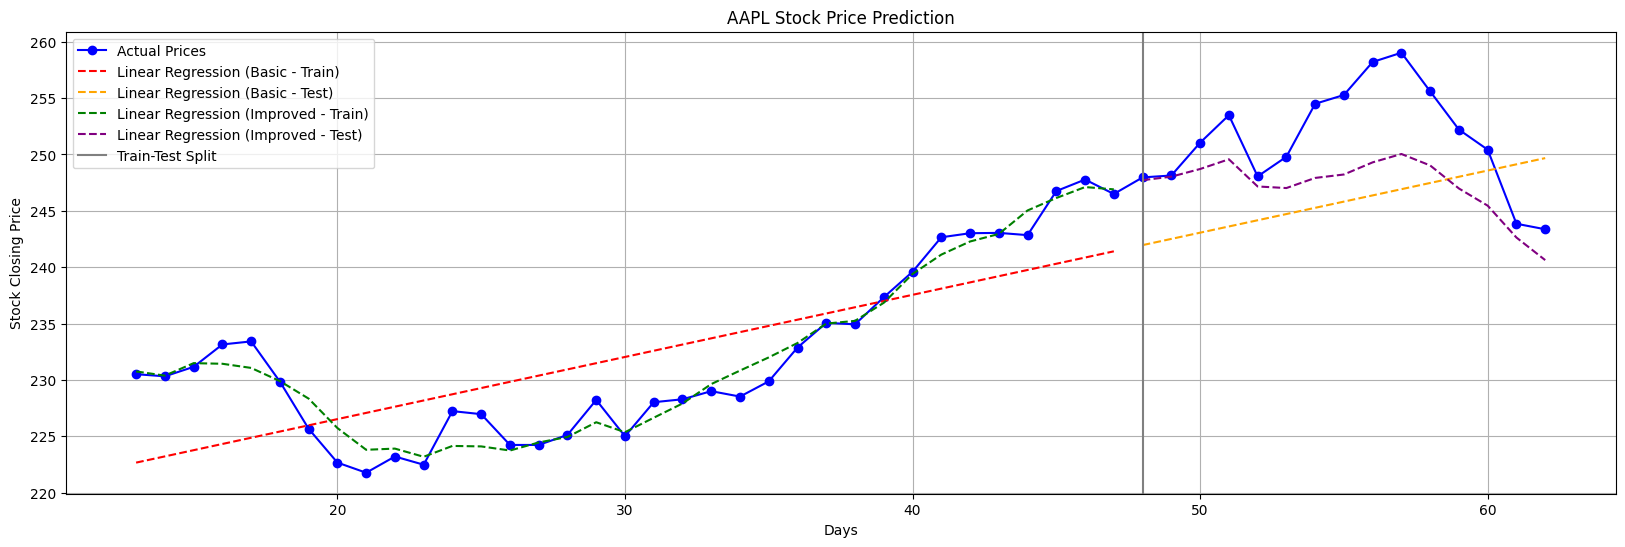

In [48]:
# main.py

# Importing required libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Input: Stock Symbol and Period
stock_symbol = "AAPL"  # You can change this to any stock symbol you want
period = "3mo"  # You can change the period to "3mo", "6mo", "1y", "2y", "5y"
train_ratio = 0.70  # Train on approximately 70% of the data

# Fetch stock data
print("Fetching stock data...")
try:
    data = yf.download(stock_symbol, period=period)
    if data.empty:
        print("No data found. Please try another stock symbol or period.")
    else:
        print("Data fetched successfully!")
        
        # Prepare data
        data.reset_index(inplace=True)
        data['Days'] = np.arange(len(data))
        
        # Define RSI calculation
        def calculate_rsi(data, period=14):
            delta = data['Close'].diff(1)
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)
            avg_gain = gain.rolling(window=period).mean()
            avg_loss = loss.rolling(window=period).mean()
            rs = avg_gain / avg_loss
            rsi = 100 - (100 / (1 + rs))
            return rsi

        # Define MACD calculation
        def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
            short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
            long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
            macd = short_ema - long_ema
            return macd

        # Calculate technical indicators
        data['RSI'] = calculate_rsi(data)
        data['MACD'] = calculate_macd(data)

        # Drop rows with NaN values due to rolling window calculations
        data = data.dropna()

        # Prepare data for models
        X_basic = data[['Days']]
        X_improved = data[['Days', 'RSI', 'MACD']]
        y = data['Close']

        # Train-test split
        train_days = int(len(data) * train_ratio)
        X_basic_train = X_basic[:train_days]
        X_basic_test = X_basic[train_days:]
        X_improved_train = X_improved[:train_days]
        X_improved_test = X_improved[train_days:]
        y_train = y[:train_days]
        y_test = y[train_days:]

        # Train basic Linear Regression model
        model_basic = LinearRegression()
        model_basic.fit(X_basic_train, y_train)
        y_pred_basic = model_basic.predict(X_basic_test)

        # Train improved Linear Regression model
        model_improved = LinearRegression()
        model_improved.fit(X_improved_train, y_train)
        y_pred_improved = model_improved.predict(X_improved_test)

        # Evaluate models
        mse_basic = mean_squared_error(y_test, y_pred_basic)
        mse_improved = mean_squared_error(y_test, y_pred_improved)

        # Additional metrics for improved clarity
        mae_basic = mean_absolute_error(y_test, y_pred_basic)
        mae_improved = mean_absolute_error(y_test, y_pred_improved)

        r2_basic = r2_score(y_test, y_pred_basic)
        r2_improved = r2_score(y_test, y_pred_improved)

        print(f"Basic Linear Regression - Mean Squared Error (MSE): {mse_basic:.2f}")
        print(f"Improved Linear Regression - Mean Squared Error (MSE): {mse_improved:.2f}")

        print(f"Basic Linear Regression - Mean Absolute Error (MAE): {mae_basic:.2f}")
        print(f"Improved Linear Regression - Mean Absolute Error (MAE): {mae_improved:.2f}")

        print(f"Basic Linear Regression - R²: {r2_basic:.2f}")
        print(f"Improved Linear Regression - R²: {r2_improved:.2f}")

        # Visualize Results
        fig, ax = plt.subplots(figsize=(20, 6))
        ax.plot(data['Days'], y, label="Actual Prices", color="blue", marker="o")

        # Plotting Linear Regression (Basic) prediction for both Train and Test sets
        ax.plot(X_basic_train['Days'], model_basic.predict(X_basic_train), label="Linear Regression (Basic - Train)", color="red", linestyle="--")
        ax.plot(X_basic_test['Days'], y_pred_basic, label="Linear Regression (Basic - Test)", color="orange", linestyle="--")

        # Plotting Improved Linear Regression prediction for both Train and Test sets
        ax.plot(X_improved_train['Days'], model_improved.predict(X_improved_train), label="Linear Regression (Improved - Train)", color="green", linestyle="--")
        ax.plot(X_improved_test['Days'], y_pred_improved, label="Linear Regression (Improved - Test)", color="purple", linestyle="--")

        # Correctly plotting the Train-Test Split line for Improved model
        ax.axvline(x=X_improved_test['Days'].iloc[0], color="grey", label="Train-Test Split")

        # Customize labels and title
        ax.set_xlabel("Days")
        ax.set_ylabel("Stock Closing Price")
        ax.set_title(f"{stock_symbol} Stock Price Prediction")
        ax.legend()
        ax.grid()
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

